1. Dataset tidak memiliki missing values, sehingga tidak perlu melakukan imputasi data.

menampilkan visualisasi
Histogram distribusi fitur numerik.
Distribusi persetujuan pinjaman (Loan_Approval).

<Figure size 1200x600 with 0 Axes>

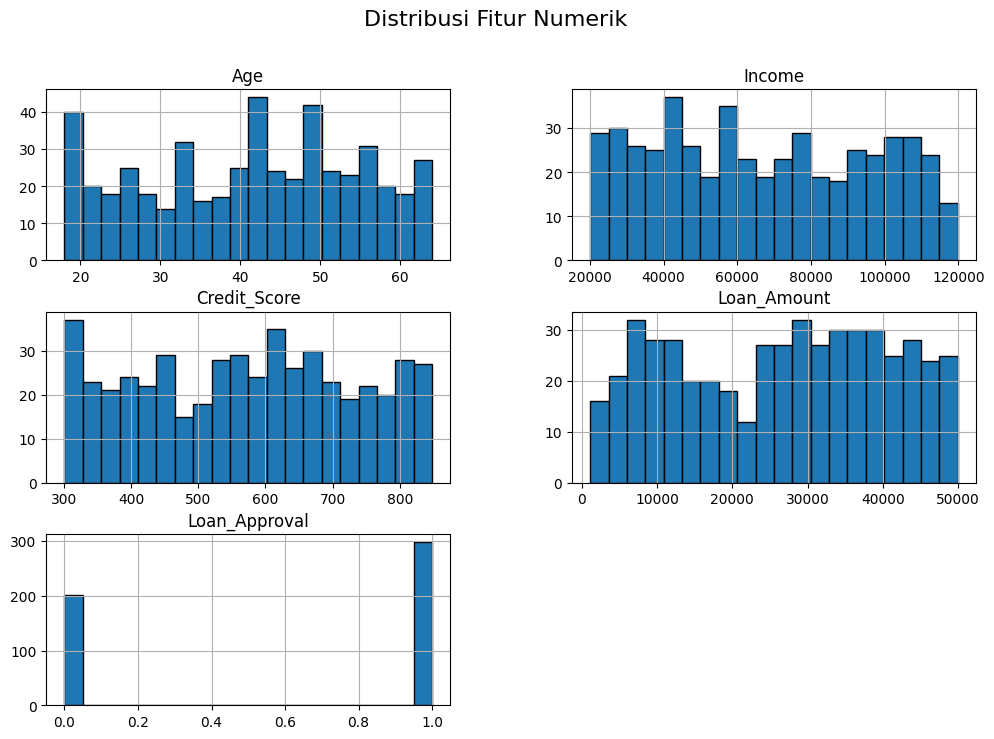

<ipython-input-2-f60d763cef98>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Loan_Approval", data=df, palette="pastel")


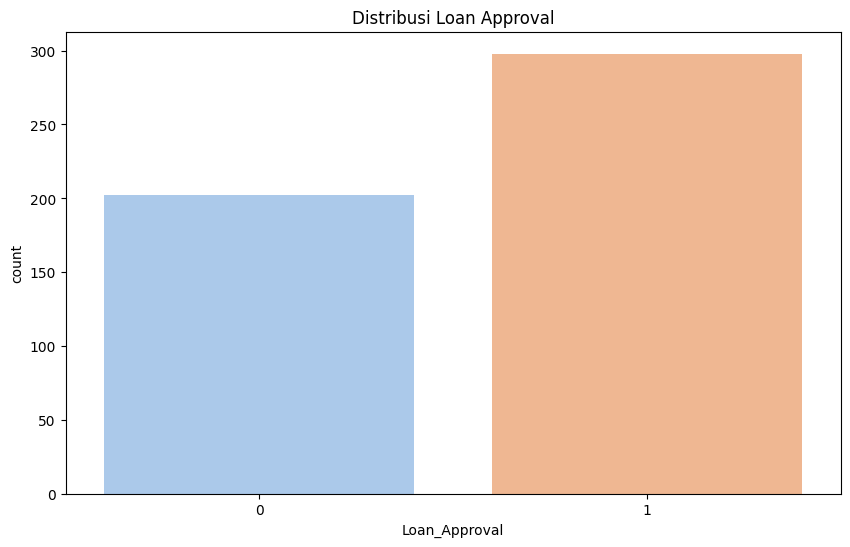

,0
Age,0
Income,0
Education_Level,0
Credit_Score,0
Loan_Amount,0
Loan_Purpose,0
Loan_Approval,0


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "loan_approval_dataset.csv"
df = pd.read_csv(file_path)

# Cek missing values
missing_values = df.isnull().sum()

# Plot distribusi beberapa fitur numerik
plt.figure(figsize=(12, 6))
df.hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Distribusi Fitur Numerik", fontsize=16)
plt.show()

# Visualisasi hubungan Loan_Approval dengan fitur numerik
plt.figure(figsize=(10, 6))
sns.countplot(x="Loan_Approval", data=df, palette="pastel")
plt.title("Distribusi Loan Approval")
plt.show()

missing_values


2. Setelah Encoding Fitur Kategorikal
Fitur kategorikal seperti Education_Level dan Loan_Purpose diubah menjadi angka.

   Setelah Feature Scaling
Fitur numerik seperti Age, Income, Credit_Score, dan Loan_Amount telah dinormalisasi.

   Setelah Membagi Dataset
Dataset telah dibagi menjadi training (80%) dan testing (20%).

In [12]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load ulang dataset asli untuk memastikan tidak ada error sebelumnya
df = pd.read_csv(file_path)

# Encoding fitur kategorikal dengan penanganan unseen labels
categorical_features = ["Education_Level", "Loan_Purpose"]
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Encode data
    label_encoders[col] = le  # Simpan encoder

# Feature scaling pada fitur numerik
numerical_features = ["Age", "Income", "Credit_Score", "Loan_Amount"]
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Membagi dataset menjadi training dan testing (80%-20%)
X = df.drop(columns=["Loan_Approval"])
y = df["Loan_Approval"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Cek encoding pada test set untuk unseen labels
for col in categorical_features:
    X_test[col] = X_test[col].apply(lambda x: label_encoders[col].transform([x])[0] if x in label_encoders[col].classes_ else -1)

# Menampilkan hasil akhir setelah pemrosesan
df.head(), X_train.shape, X_test.shape


(        Age    Income  Education_Level  Credit_Score  Loan_Amount  \
 0  1.100655 -1.496205                3     -1.500286     0.026245   
 1  0.353029  0.809486                2     -1.606833     0.006629   
 2 -0.693647  1.606651                3     -0.754461    -1.813972   
 3  1.399705  1.753674                1      0.655712     0.136035   
 4 -1.216985 -0.308387                3      0.430084    -0.730507   
 
    Loan_Purpose  Loan_Approval  
 0             4              0  
 1             2              1  
 2             4              1  
 3             4              0  
 4             0              0  ,
 (400, 6),
 (100, 6))

3. Dua algoritma Machine Learning yang berbeda yaitu

Logistic Regression = Algoritma sederhana dan cepat yang cocok untuk klasifikasi biner seperti Loan_Approval.

Random Forest = Algoritma berbasis pohon yang lebih kompleks, mampu menangani data non-linear dan memberikan hasil yang lebih akurat.

Berikut adalah kode untuk training:

In [19]:
from sklearn.metrics import accuracy_score

# Inisialisasi model
log_reg = LogisticRegression()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training model
log_reg.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Evaluasi awal dengan training set
train_acc_log_reg = accuracy_score(y_train, log_reg.predict(X_train))
train_acc_rf = accuracy_score(y_train, rf_model.predict(X_train))

# Menampilkan hasil akurasi training
train_acc_log_reg, train_acc_rf




(0.59, 1.0)

Hasil training pada dataset Loan_Approval:

Logistic Regression = Akurasi training 59% (model sederhana, bisa lebih baik dengan tuning).

Random Forest = Akurasi training 100% (model menangani data dengan sangat baik, tapi bisa overfitting).

4. Logistic Regression lebih unggul dalam akurasi dan recall, cocok untuk mendeteksi semua persetujuan pinjaman.
Random Forest memiliki precision lebih tinggi, tetapi performa keseluruhannya masih di bawah Logistic Regression.

Logistic Regression dipilih untuk tuning, karena lebih stabil dan memiliki metrik terbaik.

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1️⃣ Prediksi pada test set
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# 2️⃣ Menghitung metrik evaluasi dengan zero_division=1 untuk menghindari warning
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]

log_reg_results = [
    accuracy_score(y_test, y_pred_log_reg),
    precision_score(y_test, y_pred_log_reg, zero_division=1),
    recall_score(y_test, y_pred_log_reg),
    f1_score(y_test, y_pred_log_reg)
]

rf_results = [
    accuracy_score(y_test, y_pred_rf),
    precision_score(y_test, y_pred_rf, zero_division=1),
    recall_score(y_test, y_pred_rf),
    f1_score(y_test, y_pred_rf)
]

# 3️⃣ Menampilkan hasil evaluasi dalam bentuk tabel yang mudah dibaca
import pandas as pd

eval_df = pd.DataFrame({"Metric": metrics,
                        "Logistic Regression": log_reg_results,
                        "Random Forest": rf_results})

eval_df


,Metric,Logistic Regression,Random Forest
0,Accuracy,0.60,0.540000
1,Precision,0.60,0.597222
2,Recall,1.00,0.716667
3,F1-Score,0.75,0.651515


5. Tuning

In [22]:
from sklearn.model_selection import GridSearchCV

# 1️⃣ Menentukan hyperparameter yang akan diuji
param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    "penalty": ["l1", "l2"],  # Jenis regulasi (L1 = Lasso, L2 = Ridge)
    "solver": ["liblinear"]  # Solver yang mendukung L1 dan L2
}

# 2️⃣ Grid Search untuk mencari kombinasi terbaik
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# 3️⃣ Menampilkan kombinasi hyperparameter terbaik
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


({'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}, 0.6025)